In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Extract repository URLs and default scores
def extract_repo_data(filename):
    repos = []
    scores = []
    
    with open(filename, 'r') as f:
        content = f.read()
    
    # Split by repository sections
    sections = content.split('=' * 80)
    
    for section in sections:
        if 'Repository:' in section and 'default_score:' in section:
            # Extract repository URL
            repo_match = re.search(r'Repository: (https://github\.com/[^\n]+)', section)
            if repo_match:
                repo_url = repo_match.group(1)
                
                # Extract default score
                score_match = re.search(r'default_score: ([\d.]+)', section)
                if score_match:
                    score = float(score_match.group(1))
                    repos.append(repo_url)
                    scores.append(score)
    
    return repos, scores

# Extract data
repo_urls, default_scores = extract_repo_data("./criticality_scores.txt")

# Create DataFrame
df = pd.DataFrame({
    'repository': repo_urls,
    'default_score': default_scores
})

# Add derived columns
df['repo_name'] = df['repository'].str.extract(r'github\.com/([^/]+/[^/]+)')
df['owner'] = df['repository'].str.extract(r'github\.com/([^/]+)/')
df['project'] = df['repository'].str.extract(r'github\.com/[^/]+/([^/]+)')

print(f"Successfully extracted {len(df)} repositories with scores")
print("\nFirst 10 entries:")
print(df.head(10))

Successfully extracted 339 repositories with scores

First 10 entries:
                                          repository  default_score  \
0  https://github.com/battery-lcf/battery-archive...        0.18989   
1               https://github.com/BattMoTeam/BattMo        0.36438   
2          https://github.com/rlogiacco/BatterySense        0.32825   
3             https://github.com/EnnoidMe/ENNOID-BMS        0.24796   
4                   https://github.com/TRI-AMDD/beep        0.41229   
5                  https://github.com/jepegit/cellpy        0.43164   
6              https://github.com/pybamm-team/PyBaMM        0.55107   
7                 https://github.com/foxBMS/foxbms-2        0.23852   
8           https://github.com/pybamm-team/liionpack        0.42212   
9            https://github.com/sogno-platform/covee        0.21299   

                             repo_name           owner  \
0  battery-lcf/battery-archive-sandbox     battery-lcf   
1                    BattMoTeam

BASIC STATISTICAL SUMMARY
count    339.000000
mean       0.348422
std        0.090604
min        0.164190
25%        0.280945
50%        0.343740
75%        0.415835
max        0.597110
Name: default_score, dtype: float64

Additional Statistics:
Skewness: 0.2540
Kurtosis: -0.6308
Variance: 0.0082

Percentiles:
 1th percentile: 0.1890
 5th percentile: 0.2091
10th percentile: 0.2335
25th percentile: 0.2809
50th percentile: 0.3437
75th percentile: 0.4158
90th percentile: 0.4698
95th percentile: 0.5037
99th percentile: 0.5536


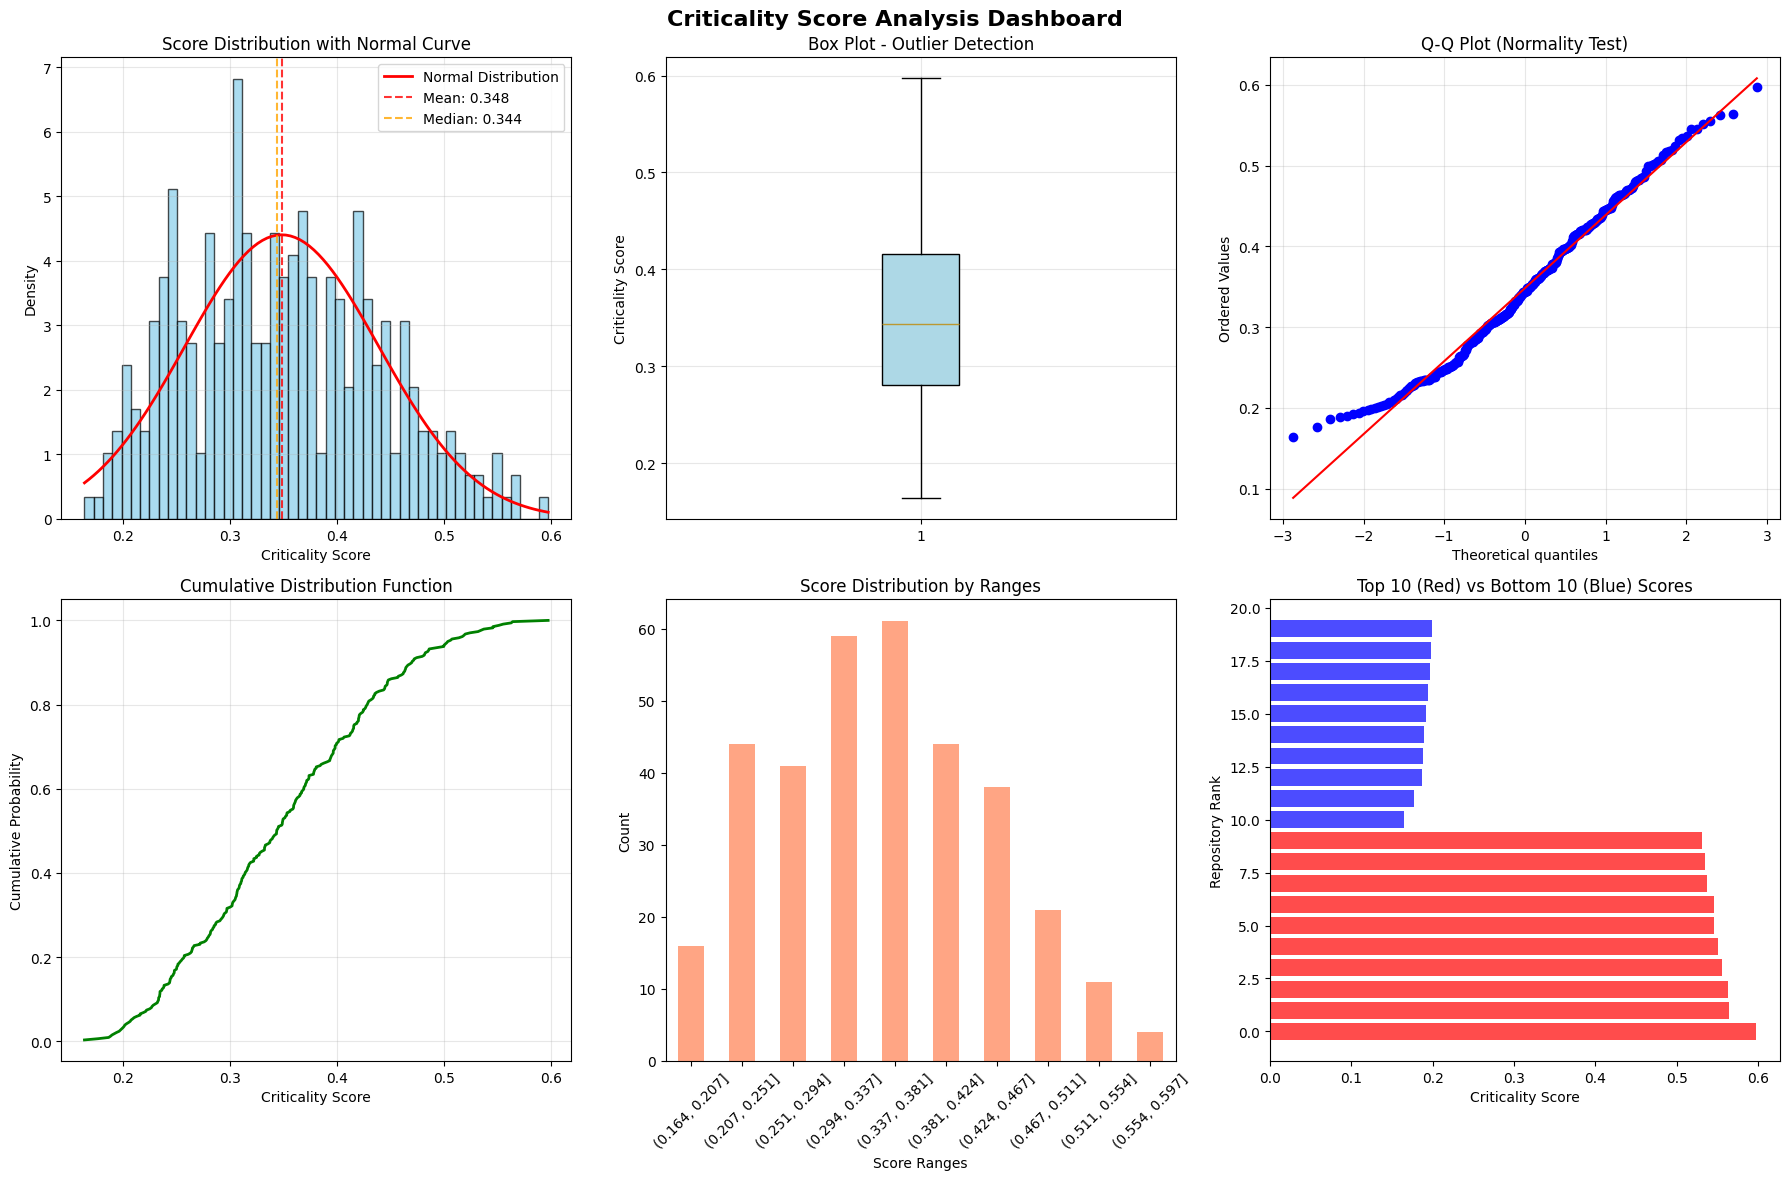

In [7]:
# ============================================================================
# BASIC STATISTICAL ANALYSIS
# ============================================================================

print("=" * 60)
print("BASIC STATISTICAL SUMMARY")
print("=" * 60)

# Basic statistics
basic_stats = df['default_score'].describe()
print(basic_stats)

# Additional statistics
print(f"\nAdditional Statistics:")
print(f"Skewness: {stats.skew(df['default_score']):.4f}")
print(f"Kurtosis: {stats.kurtosis(df['default_score']):.4f}")
print(f"Variance: {df['default_score'].var():.4f}")

# Percentiles
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
print(f"\nPercentiles:")
for p in percentiles:
    value = np.percentile(df['default_score'], p)
    print(f"{p:2d}th percentile: {value:.4f}")

# ============================================================================
# COMPREHENSIVE VISUALIZATIONS
# ============================================================================

# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Criticality Score Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Histogram with distribution curve
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(df['default_score'], bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
# Add normal distribution curve for comparison
mu, sigma = df['default_score'].mean(), df['default_score'].std()
x = np.linspace(df['default_score'].min(), df['default_score'].max(), 100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Distribution')
ax1.axvline(mu, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mu:.3f}')
ax1.axvline(df['default_score'].median(), color='orange', linestyle='--', alpha=0.8, label=f'Median: {df["default_score"].median():.3f}')
ax1.set_title('Score Distribution with Normal Curve')
ax1.set_xlabel('Criticality Score')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Box plot
ax2 = axes[0, 1]
box_plot = ax2.boxplot(df['default_score'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
ax2.set_title('Box Plot - Outlier Detection')
ax2.set_ylabel('Criticality Score')
ax2.grid(True, alpha=0.3)

# 3. Q-Q plot for normality test
ax3 = axes[0, 2]
stats.probplot(df['default_score'], dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot (Normality Test)')
ax3.grid(True, alpha=0.3)

# 4. Cumulative Distribution Function
ax4 = axes[1, 0]
sorted_scores = np.sort(df['default_score'])
cumulative = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)
ax4.plot(sorted_scores, cumulative, linewidth=2, color='green')
ax4.set_title('Cumulative Distribution Function')
ax4.set_xlabel('Criticality Score')
ax4.set_ylabel('Cumulative Probability')
ax4.grid(True, alpha=0.3)

# 5. Score ranges analysis
ax5 = axes[1, 1]
score_ranges = pd.cut(df['default_score'], bins=10, precision=3)
range_counts = score_ranges.value_counts().sort_index()
range_counts.plot(kind='bar', ax=ax5, color='coral', alpha=0.7)
ax5.set_title('Score Distribution by Ranges')
ax5.set_xlabel('Score Ranges')
ax5.set_ylabel('Count')
ax5.tick_params(axis='x', rotation=45)

# 6. Top and bottom repositories
ax6 = axes[1, 2]
top_10 = df.nlargest(10, 'default_score')
bottom_10 = df.nsmallest(10, 'default_score')
combined_extreme = pd.concat([top_10, bottom_10])
colors = ['red'] * 10 + ['blue'] * 10
ax6.barh(range(len(combined_extreme)), combined_extreme['default_score'], color=colors, alpha=0.7)
ax6.set_title('Top 10 (Red) vs Bottom 10 (Blue) Scores')
ax6.set_xlabel('Criticality Score')
ax6.set_ylabel('Repository Rank')

plt.tight_layout()


plt.show()


In [8]:
# ============================================================================
# OUTLIER ANALYSIS
# ============================================================================

print("\n" + "=" * 60)
print("OUTLIER ANALYSIS")
print("=" * 60)

# Calculate IQR for outlier detection
Q1 = df['default_score'].quantile(0.25)
Q3 = df['default_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['default_score'] < lower_bound) | (df['default_score'] > upper_bound)]
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}% of total)")
print(f"Lower bound: {lower_bound:.4f}")
print(f"Upper bound: {upper_bound:.4f}")

if len(outliers) > 0:
    print(f"\nTop 10 highest scoring repositories (potential high-impact outliers):")
    high_outliers = outliers.nlargest(10, 'default_score')[['repo_name', 'default_score']]
    for idx, row in high_outliers.iterrows():
        print(f"  {row['repo_name']}: {row['default_score']:.4f}")
    
    print(f"\nTop 10 lowest scoring repositories (potential low-impact outliers):")
    low_outliers = outliers.nsmallest(10, 'default_score')[['repo_name', 'default_score']]
    for idx, row in low_outliers.iterrows():
        print(f"  {row['repo_name']}: {row['default_score']:.4f}")

# ============================================================================
# REPOSITORY OWNER ANALYSIS
# ============================================================================

print("\n" + "=" * 60)
print("REPOSITORY OWNER ANALYSIS")
print("=" * 60)

# Analyze by repository owner
owner_stats = df.groupby('owner')['default_score'].agg(['count', 'mean', 'std', 'min', 'max']).round(4)
owner_stats = owner_stats.sort_values('mean', ascending=False)

print("Top 15 repository owners by average criticality score:")
print(owner_stats.head(15))

# Owners with multiple repositories
multi_repo_owners = owner_stats[owner_stats['count'] > 1].sort_values('mean', ascending=False)
print(f"\nOwners with multiple repositories ({len(multi_repo_owners)} total):")
print(multi_repo_owners.head(10))

# ============================================================================
# DISTRIBUTION ANALYSIS
# ============================================================================

print("\n" + "=" * 60)
print("DISTRIBUTION ANALYSIS")
print("=" * 60)

# Test for normality
shapiro_stat, shapiro_p = stats.shapiro(df['default_score'].sample(min(5000, len(df))))  # Shapiro-Wilk test (sample for large datasets)
ks_stat, ks_p = stats.kstest(df['default_score'], 'norm', args=(df['default_score'].mean(), df['default_score'].std()))

print(f"Normality Tests:")
print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.6f}")
print(f"Kolmogorov-Smirnov test: statistic={ks_stat:.4f}, p-value={ks_p:.6f}")

if shapiro_p < 0.05:
    print("→ Data is NOT normally distributed (p < 0.05)")
else:
    print("→ Data appears to be normally distributed (p >= 0.05)")

# Score distribution categories
def categorize_score(score):
    if score < 0.1:
        return 'Very Low (< 0.1)'
    elif score < 0.3:
        return 'Low (0.1-0.3)'
    elif score < 0.5:
        return 'Medium (0.3-0.5)'
    elif score < 0.7:
        return 'High (0.5-0.7)'
    else:
        return 'Very High (>= 0.7)'

df['score_category'] = df['default_score'].apply(categorize_score)
category_counts = df['score_category'].value_counts()
print(f"\nScore Categories:")
for category, count in category_counts.items():
    percentage = count / len(df) * 100
    print(f"  {category}: {count} repositories ({percentage:.1f}%)")

# ============================================================================
# INSIGHTS AND RECOMMENDATIONS
# ============================================================================

print("\n" + "=" * 60)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("=" * 60)

mean_score = df['default_score'].mean()
median_score = df['default_score'].median()
std_score = df['default_score'].std()

print(f"Dataset Overview:")
print(f"  • Total repositories analyzed: {len(df):,}")
print(f"  • Score range: {df['default_score'].min():.4f} to {df['default_score'].max():.4f}")
print(f"  • Average score: {mean_score:.4f}")
print(f"  • Median score: {median_score:.4f}")
print(f"  • Standard deviation: {std_score:.4f}")

print(f"\nDistribution Characteristics:")
skewness = stats.skew(df['default_score'])
if skewness > 0.5:
    print(f"  • Right-skewed distribution (skewness: {skewness:.3f})")
    print(f"  • Most repositories have lower criticality scores")
elif skewness < -0.5:
    print(f"  • Left-skewed distribution (skewness: {skewness:.3f})")
    print(f"  • Most repositories have higher criticality scores")
else:
    print(f"  • Approximately symmetric distribution (skewness: {skewness:.3f})")

print(f"\nCriticality Assessment:")
high_criticality = len(df[df['default_score'] > 0.5])
medium_criticality = len(df[(df['default_score'] >= 0.3) & (df['default_score'] <= 0.5)])
low_criticality = len(df[df['default_score'] < 0.3])

print(f"  • High criticality (>0.5): {high_criticality} repos ({high_criticality/len(df)*100:.1f}%)")
print(f"  • Medium criticality (0.3-0.5): {medium_criticality} repos ({medium_criticality/len(df)*100:.1f}%)")
print(f"  • Low criticality (<0.3): {low_criticality} repos ({low_criticality/len(df)*100:.1f}%)")

print(f"\nRecommendations:")
if high_criticality > 0:
    print(f"  • Focus on the {high_criticality} high-criticality repositories for security monitoring")
print(f"  • Consider implementing automated security scanning for repositories above {np.percentile(df['default_score'], 90):.3f} (90th percentile)")
print(f"  • Investigate outliers for potential security risks or exceptional importance")

# Save the DataFrame for further analysis
df.to_csv('criticality_analysis.csv', index=False)
print(f"\n✓ Analysis complete! Data saved to 'criticality_analysis.csv'")



OUTLIER ANALYSIS
Number of outliers: 0 (0.0% of total)
Lower bound: 0.0786
Upper bound: 0.6182

REPOSITORY OWNER ANALYSIS
Top 15 repository owners by average criticality score:
                      count    mean     std     min     max
owner                                                      
OpenModelica              1  0.5971     NaN  0.5971  0.5971
OpenEMS                   1  0.5639     NaN  0.5639  0.5639
OpenMDAO                  1  0.5370     NaN  0.5370  0.5370
emoncms                   1  0.5317     NaN  0.5317  0.5317
OpenFAST                  1  0.5242     NaN  0.5242  0.5242
JGCRI                     1  0.5186     NaN  0.5186  0.5186
OSGP                      1  0.5060     NaN  0.5060  0.5060
VOLTTRON                  1  0.5034     NaN  0.5034  0.5034
tmrowco                   1  0.5012     NaN  0.5012  0.5012
pybamm-team               2  0.4866  0.0912  0.4221  0.5511
LBNL-UCB-STI              1  0.4861     NaN  0.4861  0.4861
SEED-platform             1  0.4855     Na

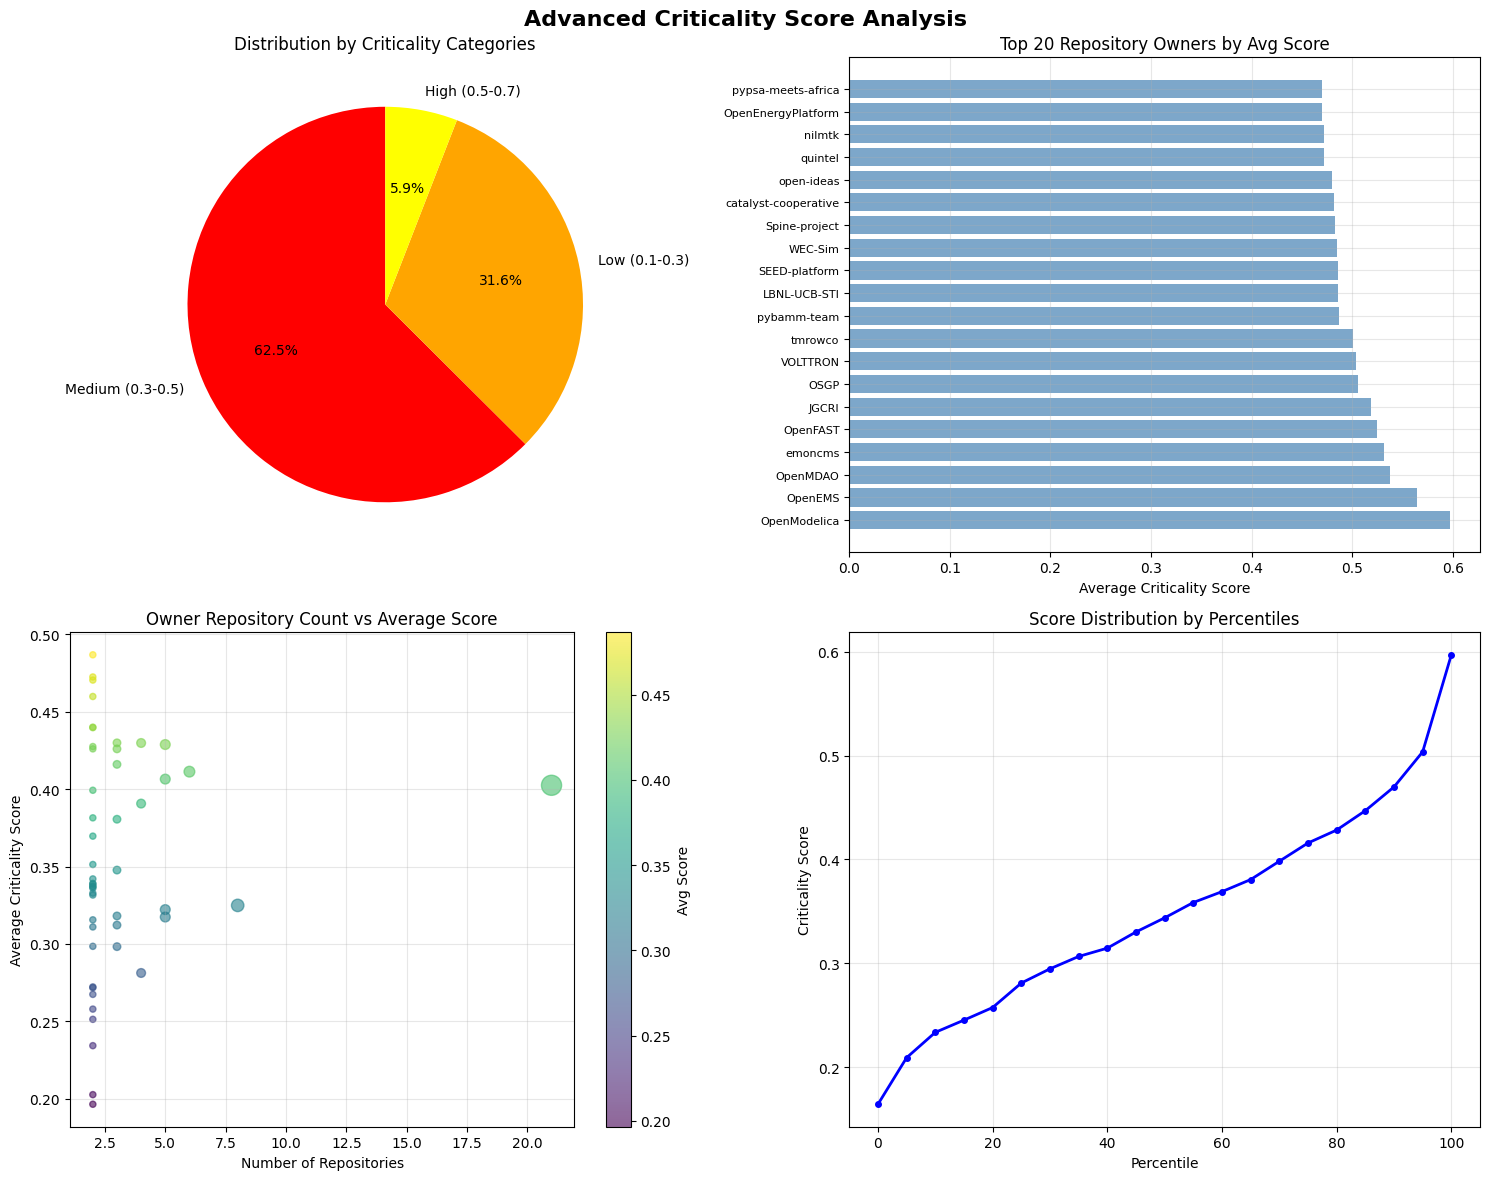


DETAILED REPOSITORY RANKINGS
🏆 TOP 20 HIGHEST CRITICALITY REPOSITORIES:
------------------------------------------------------------
 1. OpenModelica/OpenModelica                | Score: 0.5971 | Owner: OpenModelica
 2. OpenEMS/openems                          | Score: 0.5639 | Owner: OpenEMS
 3. NREL/OpenStudio                          | Score: 0.5626 | Owner: NREL
 4. e2nIEE/pandapower                        | Score: 0.5551 | Owner: e2nIEE
 5. pybamm-team/PyBaMM                       | Score: 0.5511 | Owner: pybamm-team
 6. architecture-building-systems/CityEnergyAnalyst | Score: 0.5457 | Owner: architecture-building-systems
 7. PyPSA/PyPSA                              | Score: 0.5455 | Owner: PyPSA
 8. OpenMDAO/OpenMDAO                        | Score: 0.5371 | Owner: OpenMDAO
 9. lbl-srg/modelica-buildings               | Score: 0.5343 | Owner: lbl-srg
10. emoncms/emoncms                          | Score: 0.5317 | Owner: emoncms
11. OpenFAST/openfast                        | Score:

In [ ]:
# ============================================================================
# ADDITIONAL VISUALIZATIONS AND ANALYSIS
# ============================================================================

# Create additional focused visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Advanced Criticality Score Analysis', fontsize=16, fontweight='bold')

# 1. Score distribution by categories
ax1 = axes[0, 0]
category_counts = df['score_category'].value_counts()
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
wedges, texts, autotexts = ax1.pie(category_counts.values, labels=category_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Distribution by Criticality Categories')

# 2. Repository owner analysis (top 20)
ax2 = axes[0, 1]
top_owners = owner_stats.head(20)
ax2.barh(range(len(top_owners)), top_owners['mean'], color='steelblue', alpha=0.7)
ax2.set_yticks(range(len(top_owners)))
ax2.set_yticklabels(top_owners.index, fontsize=8)
ax2.set_xlabel('Average Criticality Score')
ax2.set_title('Top 20 Repository Owners by Avg Score')
ax2.grid(True, alpha=0.3)

# 3. Score vs Repository Count (for owners with multiple repos)
ax3 = axes[1, 0]
multi_repo_data = multi_repo_owners.reset_index()
scatter = ax3.scatter(multi_repo_data['count'], multi_repo_data['mean'], 
                     s=multi_repo_data['count']*10, alpha=0.6, c=multi_repo_data['mean'], 
                     cmap='viridis')
ax3.set_xlabel('Number of Repositories')
ax3.set_ylabel('Average Criticality Score')
ax3.set_title('Owner Repository Count vs Average Score')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Avg Score')

# 4. Percentile analysis
ax4 = axes[1, 1]
percentiles = np.arange(0, 101, 5)
percentile_values = [np.percentile(df['default_score'], p) for p in percentiles]
ax4.plot(percentiles, percentile_values, 'b-', linewidth=2, marker='o', markersize=4)
ax4.set_xlabel('Percentile')
ax4.set_ylabel('Criticality Score')
ax4.set_title('Score Distribution by Percentiles')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# DETAILED REPOSITORY RANKINGS
# ============================================================================

print("\n" + "=" * 60)
print("DETAILED REPOSITORY RANKINGS")
print("=" * 60)

print("🏆 TOP 20 HIGHEST CRITICALITY REPOSITORIES:")
print("-" * 60)
top_20 = df.nlargest(20, 'default_score')[['repo_name', 'default_score', 'owner']]
for i, (idx, row) in enumerate(top_20.iterrows(), 1):
    print(f"{i:2d}. {row['repo_name']:<40} | Score: {row['default_score']:.4f} | Owner: {row['owner']}")

print(f"\n📊 BOTTOM 20 LOWEST CRITICALITY REPOSITORIES:")
print("-" * 60)
bottom_20 = df.nsmallest(20, 'default_score')[['repo_name', 'default_score', 'owner']]
for i, (idx, row) in enumerate(bottom_20.iterrows(), 1):
    print(f"{i:2d}. {row['repo_name']:<40} | Score: {row['default_score']:.4f} | Owner: {row['owner']}")

# ============================================================================
# SUMMARY STATISTICS TABLE
# ============================================================================

print(f"\n" + "=" * 60)
print("COMPREHENSIVE SUMMARY TABLE")
print("=" * 60)

summary_stats = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Range', 
               'Q1', 'Q3', 'IQR', 'Skewness', 'Kurtosis', 'CV (%)'],
    'Value': [
        len(df),
        df['default_score'].mean(),
        df['default_score'].median(),
        df['default_score'].std(),
        df['default_score'].min(),
        df['default_score'].max(),
        df['default_score'].max() - df['default_score'].min(),
        df['default_score'].quantile(0.25),
        df['default_score'].quantile(0.75),
        df['default_score'].quantile(0.75) - df['default_score'].quantile(0.25),
        stats.skew(df['default_score']),
        stats.kurtosis(df['default_score']),
        (df['default_score'].std() / df['default_score'].mean()) * 100
    ]
})

# Format the values appropriately
summary_stats['Formatted'] = summary_stats.apply(
    lambda row: f"{row['Value']:,.0f}" if row['Metric'] == 'Count' 
    else f"{row['Value']:.4f}", axis=1
)

print(summary_stats[['Metric', 'Formatted']].to_string(index=False, header=['Metric', 'Value']))

print(f"\n🎯 ANALYSIS COMPLETE!")
print(f"   • {len(df):,} repositories analyzed")
print(f"   • {len(outliers):,} outliers identified")
print(f"   • {len(owner_stats):,} unique repository owners")
print(f"   • Data exported to 'criticality_analysis.csv'")
print(f"   • Ready for further analysis or decision-making!")
